# Иследование активности пользователей википедии

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Исходные данные
stats — информация о пользователях

    stats.Edits - Количество правок
    stats.Reverts - Количество отмен чужих правок
    stats.Log - Количество иных действий
    stats.Diff - Добавленное минус удалённое
    stats.Volume - Общий объём добавленного
    stats.Tot size - Накопленная сумма добавленного
    stats.Time - Время онлайн
    stats.Speed - Скорость (количество правок в единицу времени)
    stats.User - Ник пользователя
    stats.txt - Дата в текстовом формате
votes — информация о голосовании

    votes.voter - Голосующий
    votes.can_vote - Проходит по критериям
    votes.time - Время голоса
    votes.candidate - Кандидат, по которому голос
    votes.n - Номер выборов, с дробными частями - довыборы
    votes.vote - Голос, 1 - за, -1 - против
    votes.lt - Суток от начала текущих выборов

In [2]:
dfstats = pd.read_excel('D:/PRACTICUM/stats.xlsx')
dfvotes = pd.read_excel('D:/PRACTICUM/votes.xlsx')

## Обработка данных

### 1 Обработка stats

In [3]:
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Edits     28950 non-null  int64  
 1   Reverts   10157 non-null  float64
 2   Log       28306 non-null  float64
 3   Diff      28945 non-null  object 
 4   Volume    28945 non-null  object 
 5   Tot size  28945 non-null  object 
 6   Time      28950 non-null  object 
 7   Speed     28950 non-null  object 
 8   User      28950 non-null  object 
 9   txt       28950 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.2+ MB


In [4]:
dfvotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voter      79074 non-null  object 
 1   can_vote   79074 non-null  bool   
 2   time       79074 non-null  object 
 3   candidate  79074 non-null  object 
 4   n          79074 non-null  float64
 5   vote       79074 non-null  int64  
 6   lt         79074 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [5]:
dfstats = dfstats.rename(columns={"Edits": "edits",
                   "Reverts": "reverts",
                   "Log": "log",
                   "Diff": "diff",
                   "Volume": "volume",
                   "Tot size": "tot_size",
                   "Time": "time",
                   "Speed": "speed",
                   "User": "user",
                    "txt": "date"})

Переименовал строки

In [6]:
dfstats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,200708
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,200708
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,200708
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,200708
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,200708


In [7]:
dfstats['date'] = pd.to_datetime(dfstats['date'], format='%Y%m', errors='coerce').dropna()

In [8]:
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   edits     28950 non-null  int64         
 1   reverts   10157 non-null  float64       
 2   log       28306 non-null  float64       
 3   diff      28945 non-null  object        
 4   volume    28945 non-null  object        
 5   tot_size  28945 non-null  object        
 6   time      28950 non-null  object        
 7   speed     28950 non-null  object        
 8   user      28950 non-null  object        
 9   date      28950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 2.2+ MB


In [9]:
dfstats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date
0,1589,NaN,1621.0,262 k,1.1 M,39 M,95 h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395 k,2.8 M,42 M,129 h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16 k,15 k,19 M,105 h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278 k,350 k,43 M,135 h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154 k,1.2 M,26 M,98 h,24/h,Kalan,2007-08-01


In [10]:
dfstats['date'].unique()

array(['2007-08-01T00:00:00.000000000', '2007-09-01T00:00:00.000000000',
       '2007-10-01T00:00:00.000000000', '2007-11-01T00:00:00.000000000',
       '2007-12-01T00:00:00.000000000', '2008-01-01T00:00:00.000000000',
       '2008-02-01T00:00:00.000000000', '2008-03-01T00:00:00.000000000',
       '2008-04-01T00:00:00.000000000', '2008-05-01T00:00:00.000000000',
       '2008-06-01T00:00:00.000000000', '2008-07-01T00:00:00.000000000',
       '2008-08-01T00:00:00.000000000', '2008-09-01T00:00:00.000000000',
       '2008-10-01T00:00:00.000000000', '2008-11-01T00:00:00.000000000',
       '2008-12-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2009-02-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-06-01T00:00:00.000000000', '2009-07-01T00:00:00.000000000',
       '2009-08-01T00:00:00.000000000', '2009-09-01T00:00:00.000000000',
       '2009-10-01T00:00:00.000000000', '2009-11-01

аномальных дат нет

In [11]:
dfstats['diff'].unique()

array(['262\xa0k', '395\xa0k', '16\xa0k', ..., '10', '-304\xa0k', '184'],
      dtype=object)

In [12]:
dfstats[['diff_amount', 'dif_units']] = dfstats['diff'].str.split('\xa0', expand = True)
dfstats['diff_amount'] = pd.to_numeric(dfstats['diff_amount'], errors='coerce')
dfstats['dif_units'].unique()

array(['k', 'M', None, nan], dtype=object)

In [13]:
dfstats.loc[dfstats.dif_units == 'k', "diff"] = dfstats['diff_amount'] * 1000
dfstats.loc[dfstats.dif_units == 'M', "diff"] = dfstats['diff_amount'] * 1000000
dfstats['diff'] = pd.to_numeric(dfstats['diff'], errors='coerce')

In [14]:
dfstats = dfstats.drop(columns=['diff_amount', 'dif_units'])

Привел diff в чисто числовой вид

In [15]:
dfstats['volume'].unique()

array(['1.1\xa0M', '2.8\xa0M', '15\xa0k', ..., '8.6\xa0k', '9\xa0M',
       '444'], dtype=object)

In [16]:
dfstats[['volume_amount', 'volume_units']] = dfstats['volume'].str.split('\xa0', expand = True)
dfstats['volume_amount'] = pd.to_numeric(dfstats['volume_amount'], errors='coerce')
dfstats['volume_units'].unique()

array(['M', 'k', None, nan], dtype=object)

In [17]:
dfstats.loc[dfstats.volume_units == 'k', "volume"] = dfstats['volume_amount'] * 1000
dfstats.loc[dfstats.volume_units == 'M', "volume"] = dfstats['volume_amount'] * 1000000
dfstats['volume'] = pd.to_numeric(dfstats['volume'], errors='coerce')

In [18]:
dfstats = dfstats.drop(columns=['volume_amount', 'volume_units'])

In [19]:
dfstats.sort_values(by = 'volume', ascending = True)

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date
23424,3,NaN,2124.0,186.0,228.0,22 k,9 h 05,4/m,Icannotyet,2020-08-01
23586,3,1.0,2010.0,79.0,269.0,108 k,13 h 40,2/m,Icannotyet,2020-09-01
25942,14,9.0,805.0,-51.0,423.0,129 k,14 h 30,56/h,Sleepyxls,2021-12-01
28929,736,NaN,4.0,184.0,444.0,15 M,26 h,28/h,Иван Додин,2023-08-01
22460,11,1.0,989.0,584.0,596.0,224 k,15 h 25,1/m,Yyrida,2020-01-01
...,...,...,...,...,...,...,...,...,...,...
25724,0,NaN,1251.0,NaN,NaN,NaN,36 h,34/h,Lukoje,2021-11-01
26051,0,NaN,1136.0,NaN,NaN,NaN,18 h 35,1/m,Lukoje,2022-01-01
26212,0,NaN,951.0,NaN,NaN,NaN,16 h 25,58/h,Lukoje,2022-02-01
27300,0,NaN,29490.0,NaN,NaN,NaN,1 h 40,295/m,Martin Urbanec (WMF),2022-10-01


Привел volume в чисто числовой вид

In [20]:
dfstats['tot_size'].unique()

array(['39\xa0M', '42\xa0M', '19\xa0M', '43\xa0M', '26\xa0M', '36\xa0M',
       '45\xa0M', '22\xa0M', '20\xa0M', '21\xa0M', '18\xa0M', '9.3\xa0M',
       '28\xa0M', '24\xa0M', '17\xa0M', '12\xa0M', '15\xa0M', '14\xa0M',
       '8.5\xa0M', '23\xa0M', '31\xa0M', '8.8\xa0M', '11\xa0M', '32\xa0M',
       '9.1\xa0M', '6.6\xa0M', '13\xa0M', '44\xa0M', '25\xa0M',
       '8.6\xa0M', '5.7\xa0M', '57\xa0M', '8\xa0M', '4.6\xa0M', '16\xa0M',
       '10\xa0M', '7.7\xa0M', '33\xa0M', '7.9\xa0M', '5.6\xa0M',
       '8.2\xa0M', '30\xa0M', '4.8\xa0M', '7.8\xa0M', '7.6\xa0M',
       '2.9\xa0M', '2.6\xa0M', '9.7\xa0M', '3.7\xa0M', '4.5\xa0M',
       '9.9\xa0M', '5\xa0M', '9.8\xa0M', '7.1\xa0M', '8.7\xa0M',
       '5.9\xa0M', '6\xa0M', '8.4\xa0M', '3.8\xa0M', '9\xa0M', '4.4\xa0M',
       '3.3\xa0M', '4\xa0M', '2.4\xa0M', '5.2\xa0M', '5.8\xa0M',
       '5.4\xa0M', '1.8\xa0M', '7.5\xa0M', '8.9\xa0M', '1.7\xa0M',
       '2.5\xa0M', '4.9\xa0M', '2.8\xa0M', '3.5\xa0M', '1.3\xa0M',
       '2.3\xa0M', '6.4\xa0M'

In [21]:
dfstats[['tot_size_amount', 'tot_size_units']] = dfstats['tot_size'].str.split('\xa0', expand = True)
dfstats['tot_size_amount'] = pd.to_numeric(dfstats['tot_size_amount'], errors='coerce')
dfstats['tot_size_units'].unique()

array(['M', 'k', nan], dtype=object)

In [22]:
dfstats.loc[dfstats.tot_size_units == 'k', "tot_size"] = dfstats['tot_size_amount'] * 1000
dfstats.loc[dfstats.tot_size_units == 'M', "tot_size"] = dfstats['tot_size_amount'] * 1000000
dfstats['tot_size'] = pd.to_numeric(dfstats['tot_size'], errors='coerce')

In [23]:
dfstats = dfstats.drop(columns=['tot_size_amount', 'tot_size_units'])

Перевел tot_size в чисто числовой вид

In [24]:
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   edits     28950 non-null  int64         
 1   reverts   10157 non-null  float64       
 2   log       28306 non-null  float64       
 3   diff      28945 non-null  float64       
 4   volume    28945 non-null  float64       
 5   tot_size  28945 non-null  float64       
 6   time      28950 non-null  object        
 7   speed     28950 non-null  object        
 8   user      28950 non-null  object        
 9   date      28950 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 2.2+ MB


In [25]:
dfstats['time'].unique()

array(['95\xa0h', '129\xa0h', '105\xa0h', '135\xa0h', '98\xa0h',
       '125\xa0h', '137\xa0h', '79\xa0h', '84\xa0h', '104\xa0h',
       '100\xa0h', '78\xa0h', '52\xa0h', '110\xa0h', '59\xa0h', '66\xa0h',
       '75\xa0h', '64\xa0h', '86\xa0h', '46\xa0h', '96\xa0h', '80\xa0h',
       '70\xa0h', '54\xa0h', '72\xa0h', '68\xa0h', '53\xa0h', '60\xa0h',
       '50\xa0h', '82\xa0h', '55\xa0h', '36\xa0h', '56\xa0h', '49\xa0h',
       '57\xa0h', '43\xa0h', '44\xa0h', '33\xa0h', '48\xa0h', '62\xa0h',
       '28\xa0h', '47\xa0h', '41\xa0h', '42\xa0h', '40\xa0h', '25\xa0h',
       '37\xa0h', '35\xa0h', '30\xa0h', '31\xa0h', '29\xa0h', '45\xa0h',
       '38\xa0h', '39\xa0h', '20\xa0h\xa015', '16\xa0h\xa005',
       '23\xa0h\xa055', '32\xa0h', '26\xa0h', '34\xa0h', '23\xa0h\xa045',
       '24\xa0h', '19\xa0h\xa045', '20\xa0h\xa010', '17\xa0h\xa045',
       '22\xa0h\xa025', '27\xa0h', '23\xa0h\xa020', '20\xa0h\xa030',
       '14\xa0h\xa025', '20\xa0h\xa040', '21\xa0h\xa025', '14\xa0h\xa035',
       

In [26]:
dfstats.head()

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date
0,1589,NaN,1621.0,262000.0,1100000.0,39000000.0,95 h,34/h,Altes,2007-08-01
1,1809,NaN,1328.0,395000.0,2800000.0,42000000.0,129 h,24/h,Obersachse,2007-08-01
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,105 h,26/h,Monegasque~ruwiki,2007-08-01
3,2611,NaN,6.0,278000.0,350000.0,43000000.0,135 h,19/h,User№101,2007-08-01
4,917,6.0,1416.0,154000.0,1200000.0,26000000.0,98 h,24/h,Kalan,2007-08-01


In [27]:
dfstats[['hours', 'minutes']] = dfstats['time'].str.split('\xa0h\xa0', expand = True)

In [28]:
dfstats['minutes'].unique()

array([None, '15', '05', '55', '45', '10', '25', '20', '30', '40', '35',
       '50'], dtype=object)

In [29]:
dfstats['minutes'] = dfstats['minutes'].str.replace('05', '5', regex=True)
dfstats['minutes'] = dfstats['minutes'].str.replace('None', '0', regex=True)

In [30]:
dfstats['minutes'].unique()

array([None, '15', '5', '55', '45', '10', '25', '20', '30', '40', '35',
       '50'], dtype=object)

In [31]:
dfstats['minutes'].fillna(0)

0         0
1         0
2         0
3         0
4         0
         ..
28945     0
28946    40
28947     0
28948     0
28949     0
Name: minutes, Length: 28950, dtype: object

In [32]:
#dfstats['minutes'].astype(int)

In [33]:
dfstats['minutes'].unique()

array([None, '15', '5', '55', '45', '10', '25', '20', '30', '40', '35',
       '50'], dtype=object)

In [34]:
dfstats['minutes'] = pd.to_numeric(dfstats['minutes'], errors='coerce')

In [35]:
dfstats['minutes'].unique()

array([nan, 15.,  5., 55., 45., 10., 25., 20., 30., 40., 35., 50.])

In [36]:
dfstats['hours'].unique()

array(['95\xa0h', '129\xa0h', '105\xa0h', '135\xa0h', '98\xa0h',
       '125\xa0h', '137\xa0h', '79\xa0h', '84\xa0h', '104\xa0h',
       '100\xa0h', '78\xa0h', '52\xa0h', '110\xa0h', '59\xa0h', '66\xa0h',
       '75\xa0h', '64\xa0h', '86\xa0h', '46\xa0h', '96\xa0h', '80\xa0h',
       '70\xa0h', '54\xa0h', '72\xa0h', '68\xa0h', '53\xa0h', '60\xa0h',
       '50\xa0h', '82\xa0h', '55\xa0h', '36\xa0h', '56\xa0h', '49\xa0h',
       '57\xa0h', '43\xa0h', '44\xa0h', '33\xa0h', '48\xa0h', '62\xa0h',
       '28\xa0h', '47\xa0h', '41\xa0h', '42\xa0h', '40\xa0h', '25\xa0h',
       '37\xa0h', '35\xa0h', '30\xa0h', '31\xa0h', '29\xa0h', '45\xa0h',
       '38\xa0h', '39\xa0h', '20', '16', '23', '32\xa0h', '26\xa0h',
       '34\xa0h', '24\xa0h', '19', '17', '22', '27\xa0h', '14', '21',
       '15', '18', '151\xa0h', '190\xa0h', '138\xa0h', '92\xa0h',
       '85\xa0h', '103\xa0h', '76\xa0h', '126\xa0h', '117\xa0h',
       '81\xa0h', '88\xa0h', '61\xa0h', '69\xa0h', '58\xa0h', '67\xa0h',
       '63\xa0

In [37]:
dfstats['hours'] = dfstats['hours'].str.replace(r'\D', '', regex=True).astype(int)

In [38]:
dfstats['hours'].unique()

array([ 95, 129, 105, 135,  98, 125, 137,  79,  84, 104, 100,  78,  52,
       110,  59,  66,  75,  64,  86,  46,  96,  80,  70,  54,  72,  68,
        53,  60,  50,  82,  55,  36,  56,  49,  57,  43,  44,  33,  48,
        62,  28,  47,  41,  42,  40,  25,  37,  35,  30,  31,  29,  45,
        38,  39,  20,  16,  23,  32,  26,  34,  24,  19,  17,  22,  27,
        14,  21,  15,  18, 151, 190, 138,  92,  85, 103,  76, 126, 117,
        81,  88,  61,  69,  58,  67,  63,  51,  11, 179, 142, 123, 108,
       120,  74,  91,  93,  83,  65,  13, 152, 150, 102,  87, 107, 122,
        94,  71,  73,  10,   9,  90,  12, 132, 189, 141, 159,  99,  77,
       218, 136, 145, 153, 114, 154, 101, 181, 128, 148, 134, 143, 147,
       115, 106, 116, 111, 118, 172, 127, 130, 131, 133, 113, 144, 149,
        89,  97, 173, 112, 193, 206,   5, 182, 207, 157,   6,   2, 180,
       119, 187, 163, 205, 139, 140, 233, 196, 124, 198, 238, 177, 162,
       243, 165, 146, 158, 171, 109, 121, 201, 164, 160, 208, 19

In [39]:
dfstats['minutes'] = dfstats['minutes'].fillna(0)

In [40]:
dfstats['time'] = dfstats['hours'] * 60 + dfstats['minutes']

In [41]:
dfstats['time'].unique()

array([ 5700.,  7740.,  6300.,  8100.,  5880.,  7500.,  8220.,  4740.,
        5040.,  6240.,  6000.,  4680.,  3120.,  6600.,  3540.,  3960.,
        4500.,  3840.,  5160.,  2760.,  5760.,  4800.,  4200.,  3240.,
        4320.,  4080.,  3180.,  3600.,  3000.,  4920.,  3300.,  2160.,
        3360.,  2940.,  3420.,  2580.,  2640.,  1980.,  2880.,  3720.,
        1680.,  2820.,  2460.,  2520.,  2400.,  1500.,  2220.,  2100.,
        1800.,  1860.,  1740.,  2700.,  2280.,  2340.,  1215.,   965.,
        1435.,  1920.,  1560.,  2040.,  1425.,  1440.,  1185.,  1210.,
        1065.,  1345.,  1620.,  1400.,  1230.,   865.,  1240.,  1285.,
         875.,  1305.,  1070.,  1290.,   945.,  1120.,  1325.,  1085.,
        1110.,  1165.,  1225.,  1145.,  9060., 11400.,  8280.,  5520.,
        5100.,  6180.,  4560.,  7560.,  7020.,  4860.,  5280.,  3660.,
        4140.,  3480.,  4020.,  3780.,  3060.,  1405.,  1220.,   670.,
        1155.,  1360.,  1380.,  1170.,   940., 10740.,  8520.,  7380.,
      

In [42]:
dfstats[dfstats['log'].isna()]

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date,hours,minutes
2,2734,NaN,NaN,16000.0,15000.0,19000000.0,6300.0,26/h,Monegasque~ruwiki,2007-08-01,105,0.0
88,530,NaN,NaN,5200.0,142000.0,9300000.0,1860.0,17/h,One half 3544,2007-08-01,31,0.0
110,433,NaN,NaN,137000.0,139000.0,7100000.0,1740.0,15/h,Mar,2007-08-01,29,0.0
119,397,NaN,NaN,310000.0,411000.0,9900000.0,1500.0,16/h,Optimizm,2007-08-01,25,0.0
126,377,NaN,NaN,252000.0,270000.0,12000000.0,1680.0,13/h,Alexandrov,2007-08-01,28,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
28419,1077,150.0,NaN,244000.0,775000.0,8300000.0,3240.0,20/h,Mr Artur 1974,2023-05-01,54,0.0
28461,753,118.0,NaN,-59000.0,96000.0,42000000.0,2400.0,19/h,Retimuko,2023-05-01,40,0.0
28635,609,87.0,NaN,35000.0,128000.0,32000000.0,2040.0,18/h,Retimuko,2023-06-01,34,0.0
28766,772,77.0,NaN,257000.0,483000.0,38000000.0,2340.0,20/h,Retimuko,2023-07-01,39,0.0


In [43]:
dfstats['reverts'] = dfstats['reverts'].fillna(0)

In [44]:
dfstats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28950 entries, 0 to 28949
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   edits     28950 non-null  int64         
 1   reverts   28950 non-null  float64       
 2   log       28306 non-null  float64       
 3   diff      28945 non-null  float64       
 4   volume    28945 non-null  float64       
 5   tot_size  28945 non-null  float64       
 6   time      28950 non-null  float64       
 7   speed     28950 non-null  object        
 8   user      28950 non-null  object        
 9   date      28950 non-null  datetime64[ns]
 10  hours     28950 non-null  int32         
 11  minutes   28950 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(1), int64(1), object(2)
memory usage: 2.5+ MB


In [45]:
dfstats['time'].unique()

array([ 5700.,  7740.,  6300.,  8100.,  5880.,  7500.,  8220.,  4740.,
        5040.,  6240.,  6000.,  4680.,  3120.,  6600.,  3540.,  3960.,
        4500.,  3840.,  5160.,  2760.,  5760.,  4800.,  4200.,  3240.,
        4320.,  4080.,  3180.,  3600.,  3000.,  4920.,  3300.,  2160.,
        3360.,  2940.,  3420.,  2580.,  2640.,  1980.,  2880.,  3720.,
        1680.,  2820.,  2460.,  2520.,  2400.,  1500.,  2220.,  2100.,
        1800.,  1860.,  1740.,  2700.,  2280.,  2340.,  1215.,   965.,
        1435.,  1920.,  1560.,  2040.,  1425.,  1440.,  1185.,  1210.,
        1065.,  1345.,  1620.,  1400.,  1230.,   865.,  1240.,  1285.,
         875.,  1305.,  1070.,  1290.,   945.,  1120.,  1325.,  1085.,
        1110.,  1165.,  1225.,  1145.,  9060., 11400.,  8280.,  5520.,
        5100.,  6180.,  4560.,  7560.,  7020.,  4860.,  5280.,  3660.,
        4140.,  3480.,  4020.,  3780.,  3060.,  1405.,  1220.,   670.,
        1155.,  1360.,  1380.,  1170.,   940., 10740.,  8520.,  7380.,
      

### 2 Обработка votes

In [46]:
dfvotes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79074 entries, 0 to 79073
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   voter      79074 non-null  object 
 1   can_vote   79074 non-null  bool   
 2   time       79074 non-null  object 
 3   candidate  79074 non-null  object 
 4   n          79074 non-null  float64
 5   vote       79074 non-null  int64  
 6   lt         79074 non-null  float64
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 3.7+ MB


In [47]:
dfvotes.head()

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611


In [48]:
dfvotes['n'].unique()

array([ 7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  , 14.  , 15.  ,
       15.5 , 16.  , 17.  , 18.  , 18.5 , 19.  , 19.5 , 20.  , 21.  ,
       22.  , 22.5 , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 26.5 ,
       26.75, 27.  , 27.5 , 27.75, 28.  , 28.5 , 29.  , 29.5 , 30.  ,
       31.  , 32.  , 33.  , 34.  , 35.  , 35.5 , 36.  , 36.5 ])

In [49]:
dfvotes['vote'].unique()

array([ 1, -1], dtype=int64)

In [50]:
dfvotes[dfvotes['n'] == 7]

,voter,can_vote,time,candidate,n,vote,lt
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611
...,...,...,...,...,...,...,...
1947,X-romix,True,2008-11-29 23:43:00,Chronicler,7.0,-1,6.988194
1948,X-romix,True,2008-11-29 23:43:00,Ilya Voyager,7.0,1,6.988194
1949,X-romix,True,2008-11-29 23:43:00,Kaganer,7.0,1,6.988194
1950,X-romix,True,2008-11-29 23:43:00,Kv75,7.0,1,6.988194


Данные не требуют дополнительной обработки

## Работа с votes

Иследование тенденций в выборах

In [51]:
dfvotes['date'] = pd.to_datetime(dfvotes['time']).dt.date

### Иследование 7мых выборов

In [52]:
dfvotes.loc[dfvotes.n == 7, "time"]

0       2008-11-23 00:32:00
1       2008-11-23 00:32:00
2       2008-11-23 00:34:00
3       2008-11-23 00:34:00
4       2008-11-23 00:34:00
               ...         
1947    2008-11-29 23:43:00
1948    2008-11-29 23:43:00
1949    2008-11-29 23:43:00
1950    2008-11-29 23:43:00
1951    2008-11-29 23:43:00
Name: time, Length: 1952, dtype: object

Голосование было с 23 по 29 октября

In [53]:
dfvotes7 = dfvotes[dfvotes['n'] == 7]

In [54]:
dfvotes7

,voter,can_vote,time,candidate,n,vote,lt,date
0,Kalan,True,2008-11-23 00:32:00,EvgenyGenkin,7.0,1,0.022222,2008-11-23
1,Kalan,True,2008-11-23 00:32:00,Solon,7.0,-1,0.022222,2008-11-23
2,Altes,True,2008-11-23 00:34:00,Agent001,7.0,-1,0.023611,2008-11-23
3,Altes,True,2008-11-23 00:34:00,Chronicler,7.0,1,0.023611,2008-11-23
4,Altes,True,2008-11-23 00:34:00,EvgenyGenkin,7.0,1,0.023611,2008-11-23
...,...,...,...,...,...,...,...,...
1947,X-romix,True,2008-11-29 23:43:00,Chronicler,7.0,-1,6.988194,2008-11-29
1948,X-romix,True,2008-11-29 23:43:00,Ilya Voyager,7.0,1,6.988194,2008-11-29
1949,X-romix,True,2008-11-29 23:43:00,Kaganer,7.0,1,6.988194,2008-11-29
1950,X-romix,True,2008-11-29 23:43:00,Kv75,7.0,1,6.988194,2008-11-29


In [55]:
dfvotes7['candidate'].unique()

array(['EvgenyGenkin', 'Solon', 'Agent001', 'Chronicler', 'Ilya Voyager',
       'Kv75', 'Ukkon', 'Александр Сигачёв', 'Kaganer', 'Wulfson',
       'Alexandrov', 'Berserkerus', 'VasilievVV', 'Pauk'], dtype=object)

In [56]:
dfvotespiv7 = pd.pivot_table(dfvotes7, values='voter', index=['candidate', 'date'], columns = 'vote',
                             aggfunc= "count").reset_index()

In [57]:
dfvotespiv7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   candidate  98 non-null     object 
 1   date       98 non-null     object 
 2   -1         94 non-null     float64
 3   1          92 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


In [58]:
dfvotespiv7 = dfvotespiv7.rename(columns={dfvotespiv7.columns[2]: 'protiv'}) 
dfvotespiv7 = dfvotespiv7.rename(columns={dfvotespiv7.columns[3]: 'za'}) 

In [59]:
dfvotespiv7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   candidate  98 non-null     object 
 1   date       98 non-null     object 
 2   protiv     94 non-null     float64
 3   za         92 non-null     float64
dtypes: float64(2), object(2)
memory usage: 3.2+ KB


In [60]:
dfvotespiv7['za'] = dfvotespiv7['za'].fillna(0)
dfvotespiv7['protiv'] = dfvotespiv7['protiv'].fillna(0)

In [61]:
dfvotespiv7['za'] = dfvotespiv7['za'].astype(int)

In [62]:
dfvotespiv7['protiv'] = dfvotespiv7['protiv'].astype(int)

In [63]:
dfvotespiv7

vote,candidate,date,protiv,za
0,Agent001,2008-11-23,65,4
1,Agent001,2008-11-24,17,6
2,Agent001,2008-11-25,9,0
3,Agent001,2008-11-26,2,1
4,Agent001,2008-11-27,5,1
...,...,...,...,...
93,Александр Сигачёв,2008-11-25,2,9
94,Александр Сигачёв,2008-11-26,3,6
95,Александр Сигачёв,2008-11-27,2,4
96,Александр Сигачёв,2008-11-28,0,11


In [64]:
dfvotespiv7.sort_values(by = "za", ascending = False )

vote,candidate,date,protiv,za
35,Ilya Voyager,2008-11-23,22,77
28,EvgenyGenkin,2008-11-23,23,74
49,Kv75,2008-11-23,18,73
91,Александр Сигачёв,2008-11-23,11,68
42,Kaganer,2008-11-23,13,65
...,...,...,...,...
72,Ukkon,2008-11-25,5,0
6,Agent001,2008-11-29,9,0
76,Ukkon,2008-11-29,7,0
74,Ukkon,2008-11-27,3,0


In [65]:
asd = dfvotespiv7[['candidate','za','protiv']]

In [66]:
asd

vote,candidate,za,protiv
0,Agent001,4,65
1,Agent001,6,17
2,Agent001,0,9
3,Agent001,1,2
4,Agent001,1,5
...,...,...,...
93,Александр Сигачёв,9,2
94,Александр Сигачёв,6,3
95,Александр Сигачёв,4,2
96,Александр Сигачёв,11,0


In [67]:
asd = asd.groupby(by = ['candidate']).sum()
asd['procent'] = asd['za']/(asd['za'] + asd['protiv'])

In [68]:
asd.sort_values(by = 'procent', ascending = False)

vote,za,protiv,procent
candidate,,,
Александр Сигачёв,132,23,0.851613
Kv75,146,27,0.843931
Ilya Voyager,146,29,0.834286
Kaganer,128,26,0.831169
EvgenyGenkin,134,45,0.748603
Chronicler,100,40,0.714286
Wulfson,96,61,0.611465
Pauk,71,63,0.529851
Berserkerus,49,53,0.480392


In [69]:
qwe = dfvotespiv7.sort_values(by = ["date", "za"], ascending = [True, False] )

In [70]:
qwe

vote,candidate,date,protiv,za
35,Ilya Voyager,2008-11-23,22,77
28,EvgenyGenkin,2008-11-23,23,74
49,Kv75,2008-11-23,18,73
91,Александр Сигачёв,2008-11-23,11,68
42,Kaganer,2008-11-23,13,65
...,...,...,...,...
69,Solon,2008-11-29,6,2
20,Berserkerus,2008-11-29,8,1
83,VasilievVV,2008-11-29,7,1
6,Agent001,2008-11-29,9,0


In [71]:
day1winers = qwe.head()
day1loosers = qwe.tail()
day1winall = dfvotespiv7[dfvotespiv7.candidate.isin(day1winers.candidate)]
day1looserall = dfvotespiv7[dfvotespiv7.candidate.isin(day1loosers.candidate)]

In [72]:
day1winall.set_index("date", inplace=True)
day1looserall.set_index("date", inplace=True)

(array([14206., 14207., 14208., 14209., 14210., 14211., 14212.]),
 [Text(14206.0, 0, '2008-11-23'),
  Text(14207.0, 0, '2008-11-24'),
  Text(14208.0, 0, '2008-11-25'),
  Text(14209.0, 0, '2008-11-26'),
  Text(14210.0, 0, '2008-11-27'),
  Text(14211.0, 0, '2008-11-28'),
  Text(14212.0, 0, '2008-11-29')])

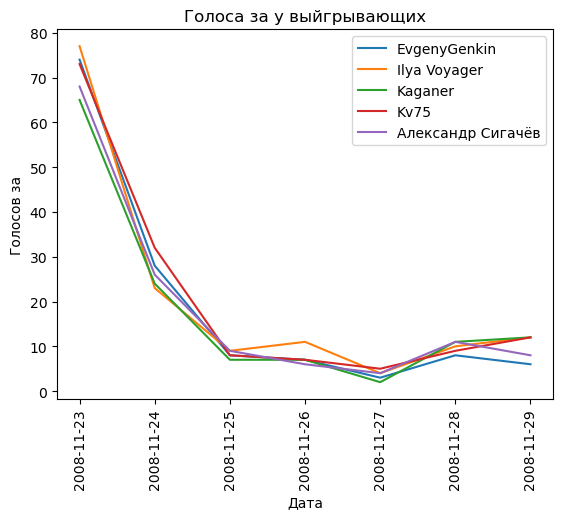

In [73]:
day1winall.groupby("candidate")["za"].plot(legend=True, xlabel="Дата", ylabel="Голосов за", title = 'Голоса за у выйгрывающих')
plt.xticks(rotation=90)

(array([14206., 14207., 14208., 14209., 14210., 14211., 14212.]),
 [Text(14206.0, 0, '2008-11-23'),
  Text(14207.0, 0, '2008-11-24'),
  Text(14208.0, 0, '2008-11-25'),
  Text(14209.0, 0, '2008-11-26'),
  Text(14210.0, 0, '2008-11-27'),
  Text(14211.0, 0, '2008-11-28'),
  Text(14212.0, 0, '2008-11-29')])

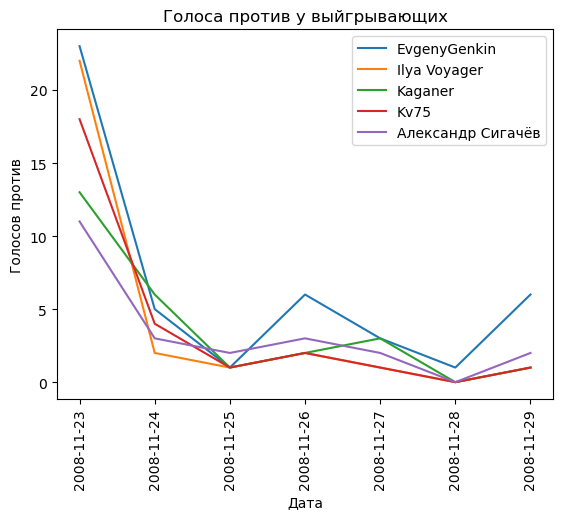

In [74]:
day1winall.groupby("candidate")["protiv"].plot(legend=True, xlabel="Дата", ylabel="Голосов против", title = 'Голоса против у выйгрывающих')
plt.xticks(rotation=90)

(array([14206., 14207., 14208., 14209., 14210., 14211., 14212.]),
 [Text(14206.0, 0, '2008-11-23'),
  Text(14207.0, 0, '2008-11-24'),
  Text(14208.0, 0, '2008-11-25'),
  Text(14209.0, 0, '2008-11-26'),
  Text(14210.0, 0, '2008-11-27'),
  Text(14211.0, 0, '2008-11-28'),
  Text(14212.0, 0, '2008-11-29')])

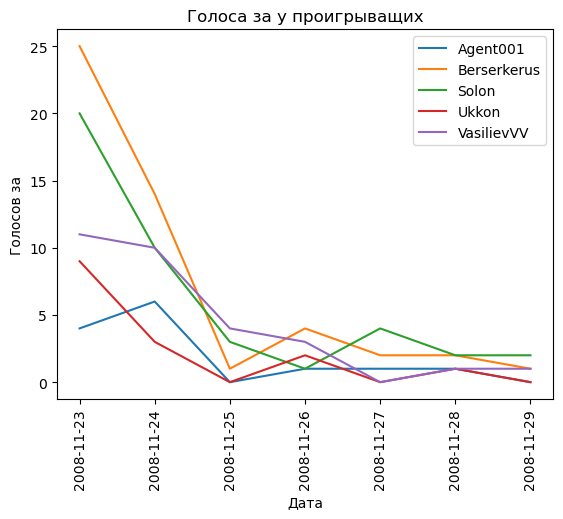

In [75]:
day1looserall.groupby("candidate")["za"].plot(legend=True, xlabel="Дата", ylabel="Голосов за", title = 'Голоса за у проигрыващих')
plt.xticks(rotation=90)

(array([14206., 14207., 14208., 14209., 14210., 14211., 14212.]),
 [Text(14206.0, 0, '2008-11-23'),
  Text(14207.0, 0, '2008-11-24'),
  Text(14208.0, 0, '2008-11-25'),
  Text(14209.0, 0, '2008-11-26'),
  Text(14210.0, 0, '2008-11-27'),
  Text(14211.0, 0, '2008-11-28'),
  Text(14212.0, 0, '2008-11-29')])

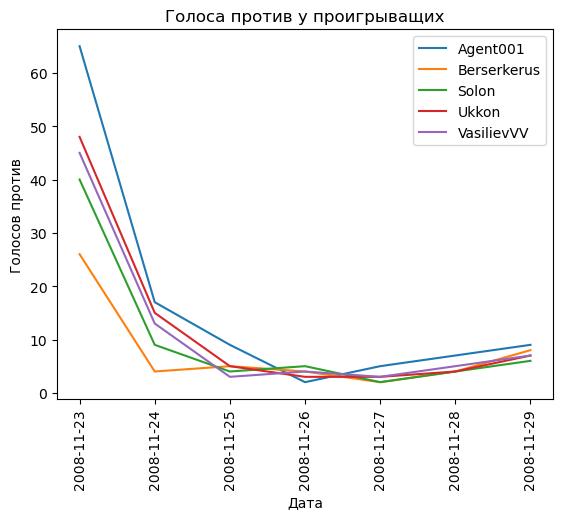

In [76]:
day1looserall.groupby("candidate")["protiv"].plot(legend=True, xlabel="Дата", ylabel="Голосов против", title = 'Голоса против у проигрыващих')
plt.xticks(rotation=90)

Вывод: в седьмых(первых в датасете) выборах победители были определенные в первый день, после первых 2х дней динамика голосов, не менялась как у проигрывающих так и у выйгрывающих.

### Иследование 23х выборов

In [77]:
dfvotes23 = dfvotes[dfvotes['n'] == 23]

In [78]:
dfvotes23['candidate'].unique()

array(['User239', 'Vald', 'Vyacheslav84', 'Кубаноид', 'Biathlon',
       'Deinocheirus', 'Neolexx', 'Иван Булкин', 'Дмитрий Кошелев'],
      dtype=object)

In [79]:
dfvotespiv23 = pd.pivot_table(dfvotes23, values='voter', index=['candidate', 'date'], columns = 'vote',
                             aggfunc= "count").reset_index()

In [80]:
dfvotespiv23 = dfvotespiv23.rename(columns={dfvotespiv23.columns[2]: 'protiv'}) 
dfvotespiv23 = dfvotespiv23.rename(columns={dfvotespiv23.columns[3]: 'za'}) 

In [81]:
dfvotespiv23

vote,candidate,date,protiv,za
0,Biathlon,2016-11-22,18.0,44.0
1,Biathlon,2016-11-23,3.0,24.0
2,Biathlon,2016-11-24,3.0,9.0
3,Biathlon,2016-11-25,NaN,12.0
4,Biathlon,2016-11-26,NaN,5.0
...,...,...,...,...
58,Кубаноид,2016-11-24,4.0,8.0
59,Кубаноид,2016-11-25,6.0,7.0
60,Кубаноид,2016-11-26,6.0,1.0
61,Кубаноид,2016-11-27,5.0,6.0


In [82]:
asd = dfvotespiv23[['candidate','za','protiv']]
asd = asd.groupby(by = ['candidate']).sum()
asd['procent'] = asd['za']/(asd['za'] + asd['protiv'])

In [83]:
asd.sort_values(by = 'procent', ascending = False)

vote,za,protiv,procent
candidate,,,
Deinocheirus,116.0,24.0,0.828571
Biathlon,113.0,28.0,0.801418
Neolexx,73.0,56.0,0.565891
Vyacheslav84,66.0,61.0,0.519685
Vald,52.0,63.0,0.452174
User239,44.0,57.0,0.435644
Кубаноид,53.0,78.0,0.404580
Дмитрий Кошелев,36.0,63.0,0.363636
Иван Булкин,15.0,86.0,0.148515


In [84]:
qwe = dfvotespiv23.sort_values(by = ["date", "za"], ascending = [True, False] )
day1winers = qwe.head()
day1loosers = qwe.tail()
day1winall = dfvotespiv23[dfvotespiv23.candidate.isin(day1winers.candidate)]
day1looserall = dfvotespiv23[dfvotespiv23.candidate.isin(day1loosers.candidate)]

In [85]:
day1winall.set_index("date", inplace=True)
day1looserall.set_index("date", inplace=True)

(array([17127., 17128., 17129., 17130., 17131., 17132., 17133.]),
 [Text(17127.0, 0, '2016-11-22'),
  Text(17128.0, 0, '2016-11-23'),
  Text(17129.0, 0, '2016-11-24'),
  Text(17130.0, 0, '2016-11-25'),
  Text(17131.0, 0, '2016-11-26'),
  Text(17132.0, 0, '2016-11-27'),
  Text(17133.0, 0, '2016-11-28')])

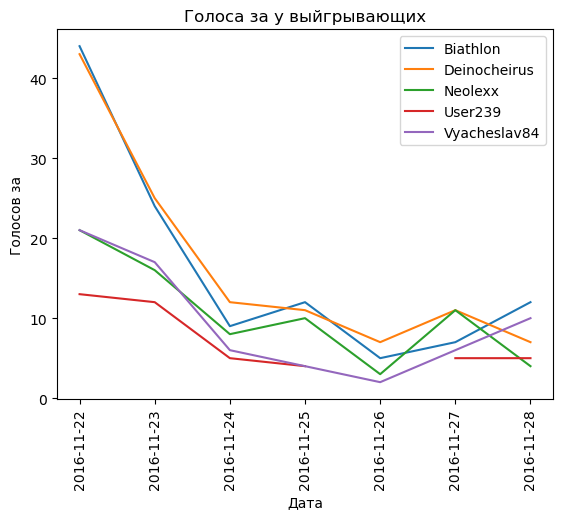

In [86]:
day1winall.groupby("candidate")["za"].plot(legend=True, xlabel="Дата", ylabel="Голосов за", title = 'Голоса за у выйгрывающих')
plt.xticks(rotation=90)

(array([17127., 17128., 17129., 17130., 17131., 17132., 17133.]),
 [Text(17127.0, 0, '2016-11-22'),
  Text(17128.0, 0, '2016-11-23'),
  Text(17129.0, 0, '2016-11-24'),
  Text(17130.0, 0, '2016-11-25'),
  Text(17131.0, 0, '2016-11-26'),
  Text(17132.0, 0, '2016-11-27'),
  Text(17133.0, 0, '2016-11-28')])

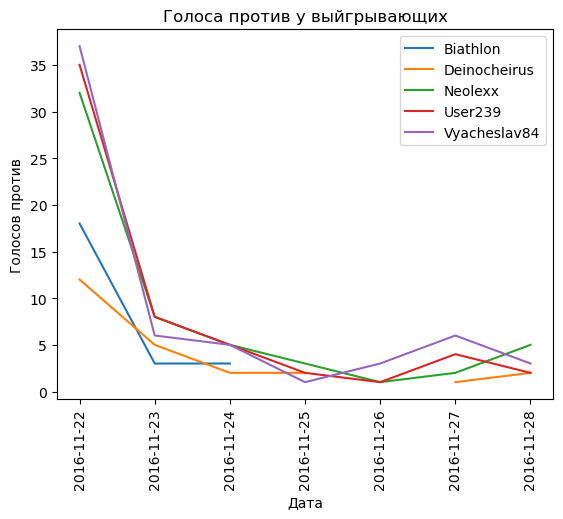

In [87]:
day1winall.groupby("candidate")["protiv"].plot(legend=True, xlabel="Дата", ylabel="Голосов против", title = 'Голоса против у выйгрывающих')
plt.xticks(rotation=90)

(array([17127., 17128., 17129., 17130., 17131., 17132., 17133.]),
 [Text(17127.0, 0, '2016-11-22'),
  Text(17128.0, 0, '2016-11-23'),
  Text(17129.0, 0, '2016-11-24'),
  Text(17130.0, 0, '2016-11-25'),
  Text(17131.0, 0, '2016-11-26'),
  Text(17132.0, 0, '2016-11-27'),
  Text(17133.0, 0, '2016-11-28')])

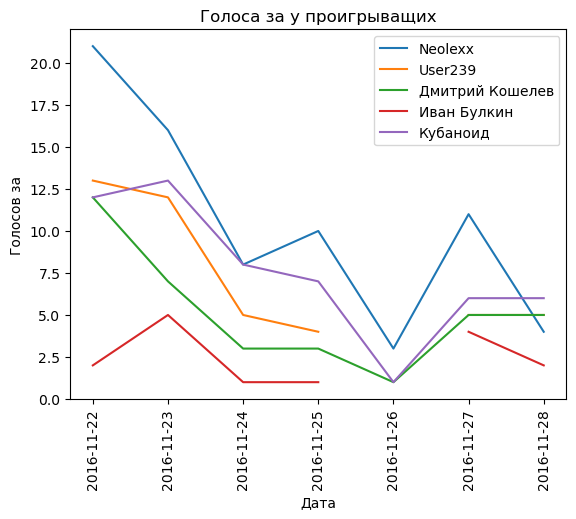

In [88]:
day1looserall.groupby("candidate")["za"].plot(legend=True, xlabel="Дата", ylabel="Голосов за", title = 'Голоса за у проигрыващих')
plt.xticks(rotation=90)

(array([17127., 17128., 17129., 17130., 17131., 17132., 17133.]),
 [Text(17127.0, 0, '2016-11-22'),
  Text(17128.0, 0, '2016-11-23'),
  Text(17129.0, 0, '2016-11-24'),
  Text(17130.0, 0, '2016-11-25'),
  Text(17131.0, 0, '2016-11-26'),
  Text(17132.0, 0, '2016-11-27'),
  Text(17133.0, 0, '2016-11-28')])

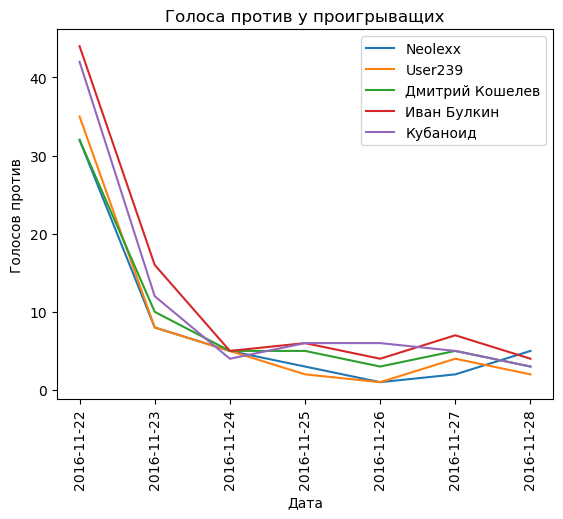

In [89]:
day1looserall.groupby("candidate")["protiv"].plot(legend=True, xlabel="Дата", ylabel="Голосов против", title = 'Голоса против у проигрыващих')
plt.xticks(rotation=90)

Вывод: в двадцать третьих выборах ситуация схожая с седьмыми выборами только в этот раз всего 2 победителя(Deinocheirus и Biathlon); остальные кандидаты не набрали 60% голосов за.

Победители выборов вновь набрали большую часть голосов в первые два дня;

В некоторые дни победители не получали голосов против.

Самые непопулярные кандидаты наоборот в некоторые дни не получали голосов за

На седьмых выборах не было такого явного разрыва в днях получания голосов.

Можно сказать, что в этих выборах после первых двух дней голосовали за побеждающих кандидатов.

### Иследование 36х выборов

In [90]:
dfvotes36 = dfvotes[dfvotes['n'] == 36]

In [91]:
dfvotespiv36 = pd.pivot_table(dfvotes36, values='voter', index=['candidate', 'date'], columns = 'vote',
                             aggfunc= "count").reset_index()

In [92]:
dfvotespiv36 = dfvotespiv36.rename(columns={dfvotespiv36.columns[2]: 'protiv'}) 
dfvotespiv36 = dfvotespiv36.rename(columns={dfvotespiv36.columns[3]: 'za'}) 

In [93]:
asd = dfvotespiv36[['candidate','za','protiv']]
asd = asd.groupby(by = ['candidate']).sum()
asd['procent'] = asd['za']/(asd['za'] + asd['protiv'])

In [94]:
asd.sort_values(by = 'procent', ascending = False)

vote,za,protiv,procent
candidate,,,
Lesless,155.0,27.0,0.851648
Ле Лой,159.0,32.0,0.832461
Rampion,117.0,41.0,0.740506
Pi novikov,98.0,44.0,0.690141
Alex Alex Lep,79.0,52.0,0.603053
Neolexx,48.0,78.0,0.380952
Vyacheslav84,46.0,99.0,0.317241


In [95]:
qwe = dfvotespiv36.sort_values(by = ["date", "za"], ascending = [True, False] )
day1winers = qwe.head()
day1loosers = qwe.tail()
day1winall = dfvotespiv36[dfvotespiv36.candidate.isin(day1winers.candidate)]
day1looserall = dfvotespiv36[dfvotespiv36.candidate.isin(day1loosers.candidate)]

In [96]:
day1winall.set_index("date", inplace=True)
day1looserall.set_index("date", inplace=True)

(array([19568., 19569., 19570., 19571., 19572., 19573., 19574.]),
 [Text(19568.0, 0, '2023-07-30'),
  Text(19569.0, 0, '2023-07-31'),
  Text(19570.0, 0, '2023-08-01'),
  Text(19571.0, 0, '2023-08-02'),
  Text(19572.0, 0, '2023-08-03'),
  Text(19573.0, 0, '2023-08-04'),
  Text(19574.0, 0, '2023-08-05')])

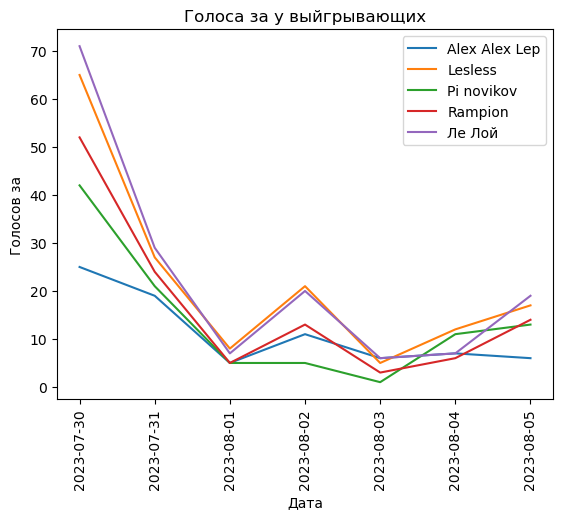

In [97]:
day1winall.groupby("candidate")["za"].plot(legend=True, xlabel="Дата", ylabel="Голосов за", title = 'Голоса за у выйгрывающих')
plt.xticks(rotation=90)

(array([19568., 19569., 19570., 19571., 19572., 19573., 19574.]),
 [Text(19568.0, 0, '2023-07-30'),
  Text(19569.0, 0, '2023-07-31'),
  Text(19570.0, 0, '2023-08-01'),
  Text(19571.0, 0, '2023-08-02'),
  Text(19572.0, 0, '2023-08-03'),
  Text(19573.0, 0, '2023-08-04'),
  Text(19574.0, 0, '2023-08-05')])

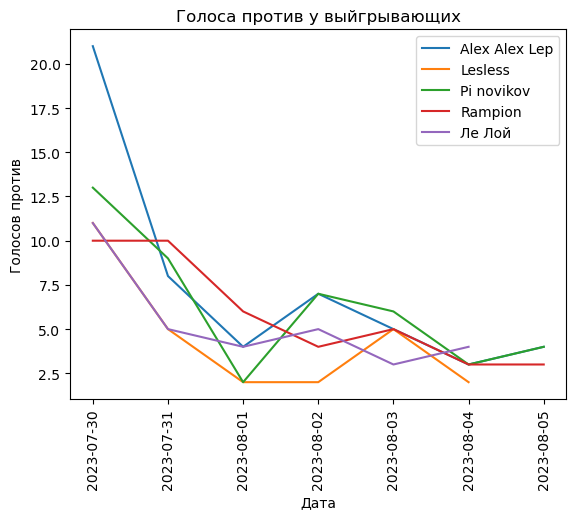

In [98]:
day1winall.groupby("candidate")["protiv"].plot(legend=True, xlabel="Дата", ylabel="Голосов против", title = 'Голоса против у выйгрывающих')
plt.xticks(rotation=90)

(array([19568., 19569., 19570., 19571., 19572., 19573., 19574.]),
 [Text(19568.0, 0, '2023-07-30'),
  Text(19569.0, 0, '2023-07-31'),
  Text(19570.0, 0, '2023-08-01'),
  Text(19571.0, 0, '2023-08-02'),
  Text(19572.0, 0, '2023-08-03'),
  Text(19573.0, 0, '2023-08-04'),
  Text(19574.0, 0, '2023-08-05')])

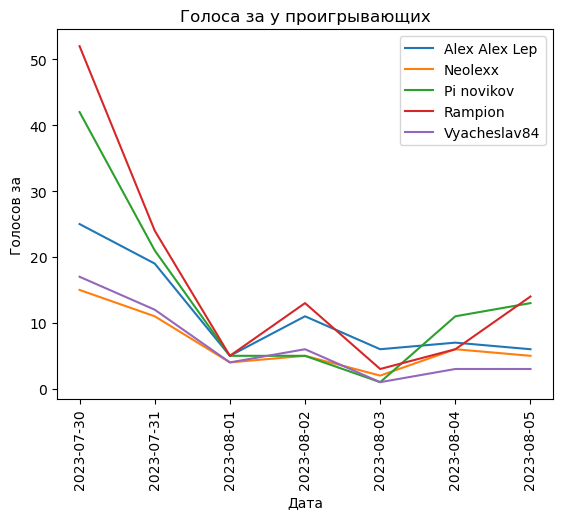

In [99]:
day1looserall.groupby("candidate")["za"].plot(legend=True, xlabel="Дата", ylabel="Голосов за", title = 'Голоса за у проигрывающих')
plt.xticks(rotation=90)

(array([19568., 19569., 19570., 19571., 19572., 19573., 19574.]),
 [Text(19568.0, 0, '2023-07-30'),
  Text(19569.0, 0, '2023-07-31'),
  Text(19570.0, 0, '2023-08-01'),
  Text(19571.0, 0, '2023-08-02'),
  Text(19572.0, 0, '2023-08-03'),
  Text(19573.0, 0, '2023-08-04'),
  Text(19574.0, 0, '2023-08-05')])

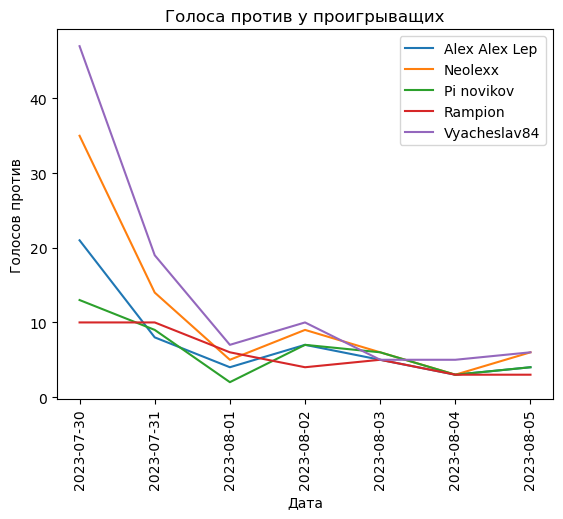

In [100]:
day1looserall.groupby("candidate")["protiv"].plot(legend=True, xlabel="Дата", ylabel="Голосов против", title = 'Голоса против у проигрыващих')
plt.xticks(rotation=90)

Вывод: тридцать шестые выборы в некоторой степени отличаются от предыдущих;

На этих выборах победило прошло 5 кандидатов из 7; 

На этих выборах так же были явные фавориты, набравшие достаточное кол-во голосов в первые три дня.

Каждый кандидат получал хоть 1 голос каждый день.

Явного голосование за фаваритов нет.

## Работа с stats

In [101]:
len(dfstats['user'].unique())

2541

### Сколько временени проводит среднестатистический пользователь онлаин

In [102]:
dfstats[dfstats['user'] == 'Lesless'].sort_values(by = 'hours')

,edits,reverts,log,diff,volume,tot_size,time,speed,user,date,hours,minutes
22184,344,172.0,248.0,526000.0,568000.0,22000000.0,1800.0,20/h,Lesless,2019-11-01,30,0.0
21544,400,199.0,368.0,213000.0,390000.0,26000000.0,2340.0,20/h,Lesless,2019-07-01,39,0.0
16462,444,0.0,335.0,291000.0,414000.0,19000000.0,2460.0,19/h,Lesless,2016-09-01,41,0.0
28577,505,289.0,367.0,415000.0,828000.0,36000000.0,2700.0,19/h,Lesless,2023-06-01,45,0.0
23776,551,281.0,363.0,683000.0,752000.0,39000000.0,2820.0,19/h,Lesless,2020-10-01,47,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22205,1671,882.0,1114.0,3200000.0,3500000.0,101000000.0,8760.0,19/h,Lesless,2019-12-01,146,0.0
28206,2084,1221.0,1174.0,3300000.0,4400000.0,149000000.0,9000.0,22/h,Lesless,2023-04-01,150,0.0
26556,1897,1006.0,2145.0,2800000.0,3300000.0,143000000.0,9180.0,26/h,Lesless,2022-05-01,153,0.0
28053,2359,1429.0,1320.0,3200000.0,4100000.0,153000000.0,10080.0,22/h,Lesless,2023-03-01,168,0.0


<Axes: xlabel='hours'>

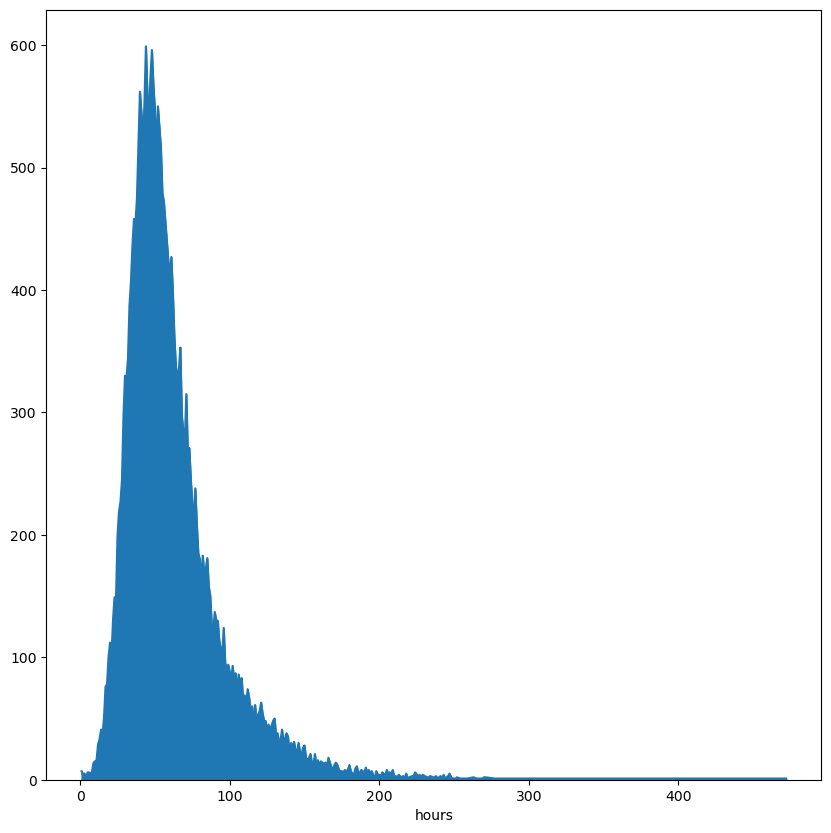

In [103]:
dfstats.groupby("hours")["user"].aggregate('count').plot(kind = 'area', figsize = (10,10))

In [104]:
dfstats['hours'].max()

472

<Axes: xlabel='hours'>

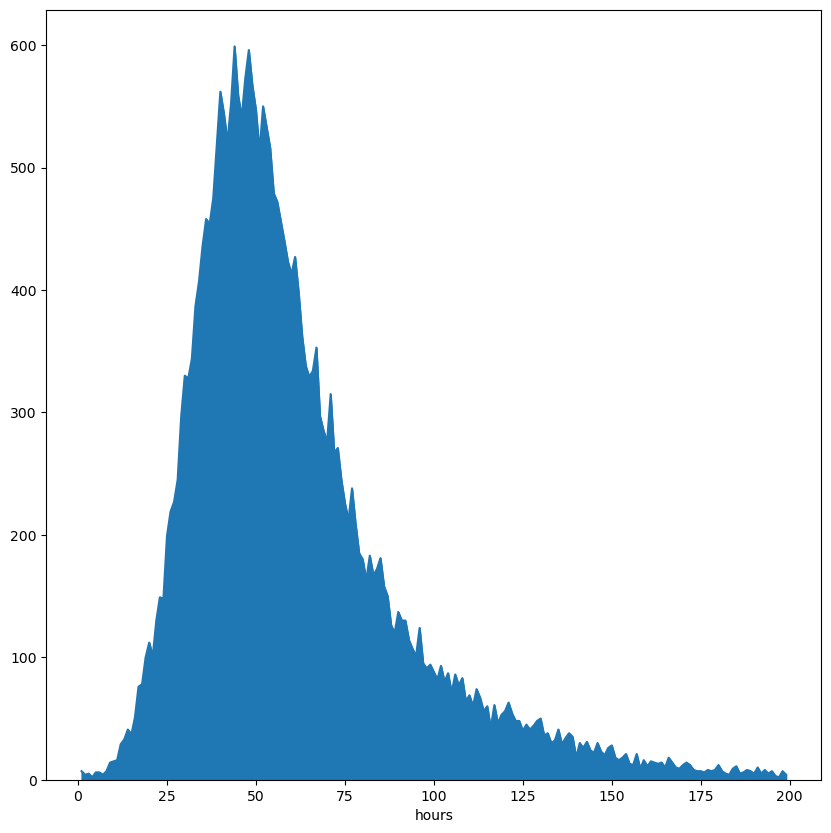

In [105]:
dfstats[dfstats['hours']<200].groupby("hours")["user"].aggregate('count').plot(kind = 'area', figsize = (10,10))

In [106]:
dfstats['hours'].median()

54.0

В среднем пользователи проводоят 54 часа онлаин.

Скорее всего это сумма часов за три недели или другой промежуток времени.

### Вклад пользователей

In [107]:
avg_time = dfstats.sort_values('hours').drop_duplicates('user', keep='last')
#Оставляем только последнии записи о пользователях

In [108]:
dfstats['edits'].median()

865.0

In [109]:
dfstats['edits'].unique()

array([1589, 1809, 2734, ..., 3019, 2830, 2724], dtype=int64)

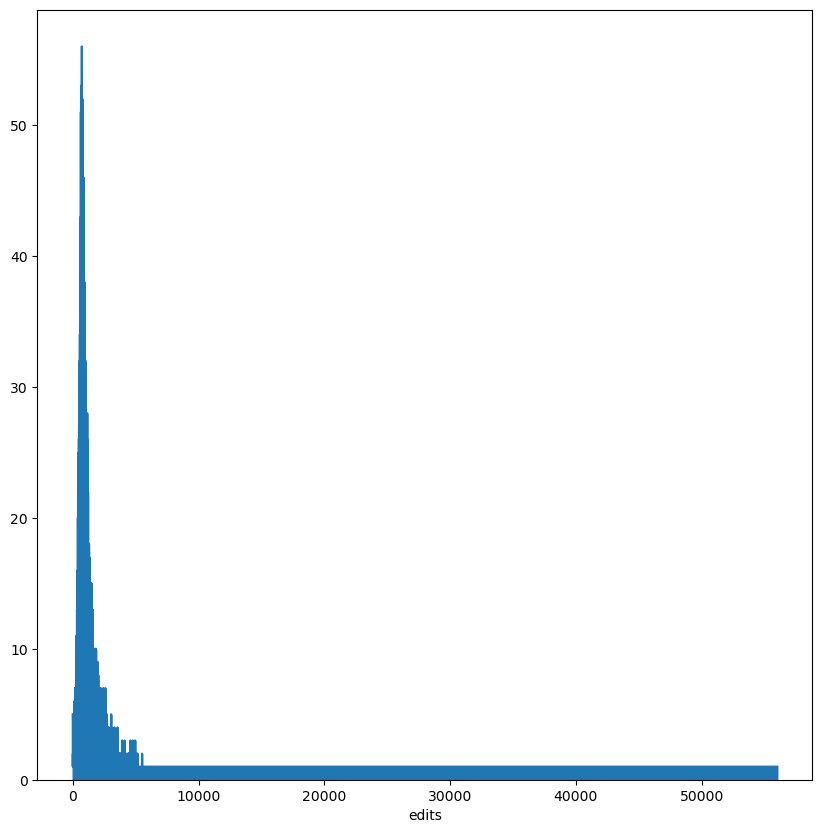

In [110]:
avg_volume = dfstats.groupby("edits")["user"].aggregate('count').plot(kind = 'area', figsize = (10,10))

<Axes: xlabel='edits'>

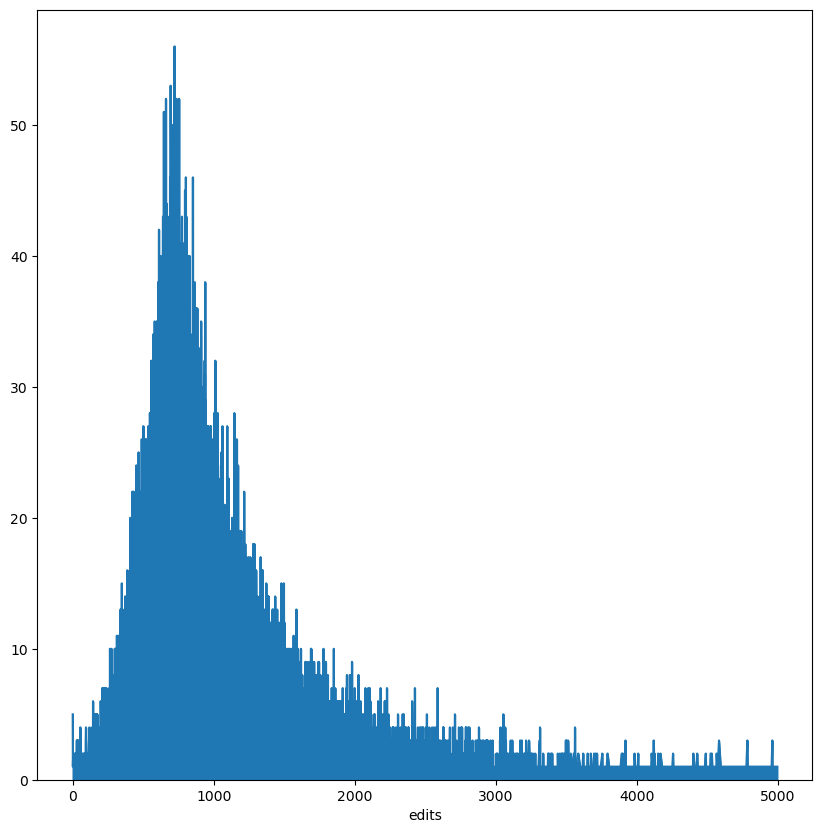

In [111]:
dfstats[dfstats['edits']<5000].groupby("edits")["user"].aggregate('count').plot(kind = 'area', figsize = (10,10))

В среднем 865 правок. Похоже что все данные в этом датафрейме суммируются за некоторый промежуток времени(скорее всего 3 недели ) и полученные значения записываются на текущую дату.